In [68]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import string

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import plotly.express as px

In [69]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [70]:
data = pd.read_csv("/content/drive/MyDrive/fake_news_detection/train.csv")
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [71]:
# drop id and text
data.drop(['id','text'],axis=1,inplace=True)
data.head()

,title,author,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,1


## **Clean data**

In [72]:
# Drop Null values
data = data.dropna()
# Drop Duplicated Values
data = data.drop_duplicates(keep='first')

In [73]:
data.head()

,title,author,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,1


In [74]:
# Merge both Columns author and Title and Create New Column Content
data['content'] = data['author'] + ' ' + data['title'] 

## **Data preprocessing**

In [75]:
# Function for entire text transformation
ps = PorterStemmer() 
def stemming(content):
    # remove numerical values
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    # convert text to lower case
    stemmed_content = stemmed_content.lower()
    # tokenize the text
    stemmed_content = stemmed_content.split()
    # remove stopword
    stemmed_content = [ps.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [76]:
data['content'] = data['content'].apply(stemming)

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18121 entries, 0 to 20799
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    18121 non-null  object
 1   author   18121 non-null  object
 2   label    18121 non-null  int64 
 3   content  18121 non-null  object
dtypes: int64(1), object(3)
memory usage: 707.9+ KB


In [78]:
# Drop title author and old content column
data = data.drop(['title','author'],axis=1)
data.head()

,label,content
0,1,darrel lucu hous dem aid even see comey letter...
1,0,daniel j flynn flynn hillari clinton big woman...
2,1,consortiumnew com truth might get fire
3,1,jessica purkiss civilian kill singl us airstri...
4,1,howard portnoy iranian woman jail fiction unpu...


In [79]:
# number of characters, number of words
data['number_of_characters'] = data['content'].apply(lambda x:len(x))
data['number_of_words'] = data['content'].apply(lambda x:len(nltk.word_tokenize(x)))

In [80]:
data.head()

,label,content,number_of_characters,number_of_words
0,1,darrel lucu hous dem aid even see comey letter...,67,12
1,0,daniel j flynn flynn hillari clinton big woman...,62,10
2,1,consortiumnew com truth might get fire,38,6
3,1,jessica purkiss civilian kill singl us airstri...,56,8
4,1,howard portnoy iranian woman jail fiction unpu...,84,12


## **Data visualization**

<AxesSubplot:xlabel='label', ylabel='count'>

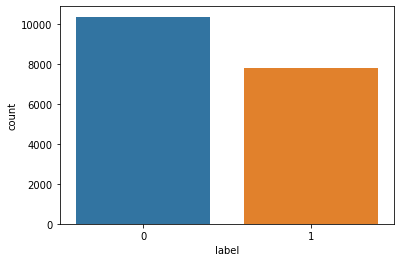

In [81]:
# Check Count of labels
sns.countplot(x='label',data=data)
# equal Distribution between Fake News and Real News
# no chance of bias

In [82]:
# statical info for the data
data[['number_of_characters','number_of_words']].describe()

,number_of_characters,number_of_words
count,18121.000000,18121.000000
mean,67.892059,11.056233
std,20.098124,3.243721
min,0.000000,0.000000
25%,56.000000,9.000000
50%,68.000000,11.000000
75%,79.000000,13.000000
max,330.000000,51.000000


**True news words count**

In [83]:
# library for Count Words
from collections import Counter

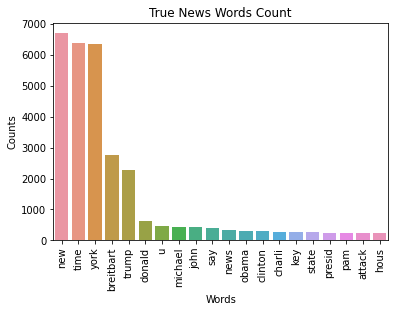

In [84]:

# create list of True News words
true_news_words_list = data[data['label']==0]['content'].str.cat(sep = " ").split()

# create DataFrame of that
true_news_words_df = pd.DataFrame(Counter(true_news_words_list).most_common(20))

# Plot barplot of this words
sns.barplot(x=true_news_words_df[0],y=true_news_words_df[1])
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('True News Words Count')
plt.show()

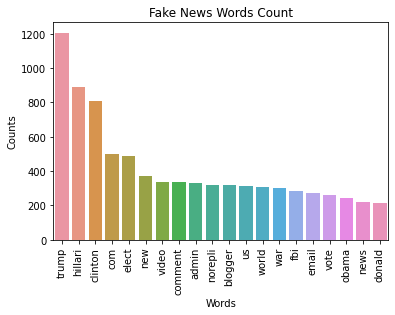

In [85]:
# create list of Fake News words
true_news_words_list = data[data['label']==1]['content'].str.cat(sep = " ").split()

# create DataFrame of that
true_news_words_df = pd.DataFrame(Counter(true_news_words_list).most_common(20))

# Plot barplot of this words
sns.barplot(x=true_news_words_df[0],y=true_news_words_df[1])
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Fake News Words Count')
plt.show()

## **Train data**

In [86]:
# set feature and target
x = data['content'].values
y = data['label'].values
# convert text to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(x)
x = vectorizer.transform(x)
# split the data
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.25,random_state=7,stratify=y)

**Logistic Regression**

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [88]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [89]:
Y_pred = model.predict(X_test)
val_accuracy = accuracy_score(Y_pred, Y_test)

In [90]:
print('Accuracy score of the validation data : ', val_accuracy)

Accuracy score of the validation data :  0.9823438534539837


In [91]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2589
           1       0.97      0.99      0.98      1942

    accuracy                           0.98      4531
   macro avg       0.98      0.98      0.98      4531
weighted avg       0.98      0.98      0.98      4531



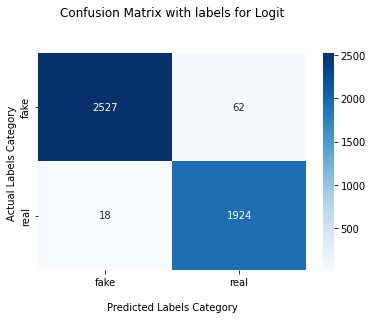

In [92]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
ax = sns.heatmap(conf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Confusion Matrix with labels for Logit\n\n');
ax.set_xlabel('\nPredicted Labels Category')
ax.set_ylabel('Actual Labels Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([ "fake","real"])
ax.yaxis.set_ticklabels(['fake',"real"])

## Display the visualization of the Confusion Matrix.
plt.show()

**Support Vector Machine Classification**

In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [109]:
tree = DecisionTreeClassifier(random_state=1, criterion='gini')
tree = tree.fit(X_train, Y_train)
Y_pred = tree.predict(X_test)

In [110]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
conf_matrix 

array([[2572,   17],
       [  31, 1911]])

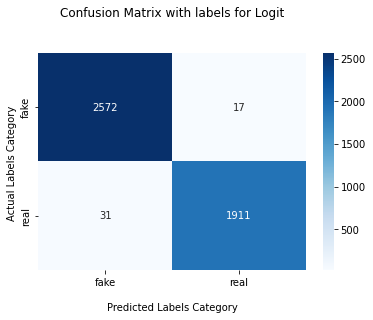

In [111]:
ax = sns.heatmap(conf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Confusion Matrix with labels for Logit\n\n');
ax.set_xlabel('\nPredicted Labels Category')
ax.set_ylabel('Actual Labels Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([ "fake","real"])
ax.yaxis.set_ticklabels(['fake',"real"])

## Display the visualization of the Confusion Matrix.
plt.show()

In [112]:
import joblib
joblib.dump(tree, '/content/drive/MyDrive/fake_news_detection/DecisionTree.sav')

['/content/drive/MyDrive/fake_news_detection/DecisionTree.sav']

In [113]:
joblib.dump(model, '/content/drive/MyDrive/fake_news_detection/LogisticRegression.sav')

['/content/drive/MyDrive/fake_news_detection/LogisticRegression.sav']

In [114]:
X_test

<4531x15960 sparse matrix of type '<class 'numpy.float64'>'
	with 48355 stored elements in Compressed Sparse Row format>